# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 9:
1. 18120533 - Dương Đoàn Bảo Sơn - https://github.com/baosonhcmus
2. 18120498 - Nguyễn Thị Hồng Nhung - https://github.com/nhung-ng
3. 18120009 - Vương Gia Bảo - https://github.com/bao12012000
4. 18120543 - Trần Đại Tài - https://github.com/trandaitai327

Link thùng chứa Github của nhóm: [Link](https://github.com/trandaitai327/IEEE-CIS-Fraud-Detection)

## Mô tả bài toán

[IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/overview)
### Bối cảnh
Đây là cuộc thì được tổ chức bởi  Các nhà nghiên cứu từ IEEE Computational Intelligence Society (IEEE-CIS) hợp tác với công ty dịch vụ thanh toán hàng đầu thế giới - Vesta Corporation  nhằm tìm kiếm các giải pháp tốt nhất cho việc phát hiện gian lận từ các giao dịch của khách hàng, giúp hàng trăm nghìn doanh nghiệp giảm thất thoát do gian lận và tăng doanh thu của họ.
### Đánh giá:
Độ đo [Area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)(AUC)
### Submission File:
Đối với mỗi `TransactionID` trong tập thử nghiệm, bạn phải dự đoán một xác suất cho biến `isFraud`. Tệp phải chứa tiêu đề và có định dạng sau:

TransactionID,isFraud

3663549,0.5

3663550,0.5

3663551,0.5

etc.

### Dữ liệu:
- Dữ liệu đến từ các giao dịch thương mại điện tử của các khách hàng của Vesta bao gồm các features từ loại thiết bị cho đến features của sản phẩm cũng như thông tin về các giao dịch và cho phép tạo các features mới để cải thiện kết quả của model.

- Dữ liệu được chia thành hai file:  identity và transactionđược nối với nhau bằng TransactionID. Không phải tất cả các giao dịch đều có thông tin nhận dạng tương ứng.

- Các thuộc tính:
  + Transaction Table:
    * TransactionDT: thời gian tính từ một móc tham chiếu  (ngày/ giờ) nhất định (không phải thời gian thực tế).
    * TransactionAMT: số tiền thanh toán cho giao dịch  (USD).
    * ProductCD:  mã sản phẩm  của mỗi giao dịch.
    * card1 - card6: thông tin thẻ thanh toán, chẳng hạn như loại thẻ, ngân hàng phát hành, quốc gia, v.v.
    * addr: địa chỉ user.
    * dist: khoảng cách giữa (không giới hạn) địa chỉ thanh toán, địa chỉ gửi, mã zip, địa chỉ IP, mã vùng điện thoại, v.v.
    * P_ and (R__) emaildomain: tên miền email của người mua và người nhận, một số giao dịch nhất định không cần người nhận, do đó có thể null.
    * C1-C14: counting, có bao nhiêu địa chỉ được tìm thấy có liên quan đến thẻ thanh toán, v.v (Ý nghĩa thực tế được che giấu).
    * D1-D15: timedelta (chẳng hạn thời gian giữa các lần giao dịch).
    * M1-M9: match (tên trên thẻ, địa chỉ, vv..vv.).
    * Vxxx: các features  bao gồm xếp hạng, đếm và các quan hệ thực thể khác.
    * Categorical Features: ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1 - M9.

  + Indentity Table:
    * Các biến trong bảng này là thông tin giúp xác thực/nhận dạng - thông tin kết nối mạng (IP, ISP, Proxy, v.v.) và chữ ký số (UA / browser / os / version, v.v.) được liên kết với các giao dịch.Chúng được thu thập bởi hệ thống chống gian lận của Vesta và các đối tác bảo mật kỹ thuật số. (Các tên trường được che dấu và từ điển ghép nối sẽ không được cung cấp để bảo vệ quyền riêng tư và thỏa thuận hợp đồng) .
    * Categorical Features: DeviceType, DeviceInfo.
    * id_12 - id_38 : là các numerical features cho Identity như rank thiết bị/ip_domain/ proxy, v.v. Ngoài ra, nó còn ghi lại dấu vân tay hành vi như số lần đăng nhập tài khoản / không đăng nhập được, thời gian đăng nhập tài khoản vẫn còn trên trang, v.v.

## Giải quyết bài toán

[Giải pháp hạng 1 - Chris Deotte & Konstantin Yakovlev](https://www.kaggle.com/c/ieee-fraud-detection/discussion/111284?fbclid=IwAR1CdMPVYUNmvIgxfDQbExwpYZZyU8SiMICVvfXwJEOSRIFEjE-2lUapRMg)   
**Time is not most important !!!**
- Không phải bản chất của gian lận thay đổi theo thời gian mà là do tập khách hàng thay đổi theo thời gian.
- Thử thách của cuộc thi này là dự đoán những khách hàng mà chúng ta không nhìn thấy được. Thực vậy dữ liệu private gồm 68.2% khách hàng chúng ta không nhìn thấy trong tập train, 16.4% tồn tại trong tập train và tập test, 15,4% là không chắc chắn (số liệu sau khi cuộc thi kết thúc).

* 
<img src="https://github.com/nhung-ng/IEEE-CIS-Fraud-Detection/blob/main/image/distr_clients.png?raw=1" alt="dis" width="650">

### Hướng giải quyết :
>Trong solution này, nhóm tham khảo các thông tin được tác giả chia sẻ qua các discussion và các mô tả, notebook mà tác giả cung cấp. 
Với một số bước mà tác giả không giải thích rõ ràng hoặc các bước mà tác giả thừa kế, tham khảo lại từ người khác (cụ thể là những người tham gia vào cuộc thi này), nhóm em sẽ thừa kế và tìm hiểu các kết quả đó chứ không đi vào bước thực hiện cụ thể(đó là bước nào thì nhóm em sẽ nói rõ khi đi vào các bước ở bên dưới). 
>
>Nhóm chọn tập trung vào một mô hình (cụ thể là XGB) trong 3 mô hình mà nhóm tác giả kết hợp để giải quyết. Trong quá trình code lại thì nhóm em cũng có điều chỉnh một số chỗ để code ngắn gọn và rõ ràng hơn (chỗ nào code lại hoàn toàn theo tác giả và chỗ nào code lại có điều chỉnh thì nhóm em đều có comment rõ ràng trong phần code ở bên dưới).

**Tóm tắt cách giải quyết**
- Thay vì dự đoán giao dịch gian lận thì chúng ta phát hiện khách hàng gian lận.

**Các phần quan trọng trong solution**
- [EDA for Columns V and ID](https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id)
- [Feature Engineering and Feature Selection](https://www.kaggle.com/c/ieee-fraud-detection/discussion/111308)
- [The Magic Works](https://www.kaggle.com/cdeotte/xgb-fraud-with-magic-0-9600#How-the-Magic-Works)


### Tìm hiểu dữ liệu - Exploratory Data Analysis



Nhóm tác giả đã sử dụng kết quả [EDA của Alijs](https://www.kaggle.com/alijs1/ieee-transaction-columns-reference) (một người khác cũng tham gia vào cuộc thi) cho 53 cột thuộc tính trong Transactions table (khác với V) và 95 cột V đầu tiên trong 339 cột V ban đầu.

Với 339 cột thuộc tính V ,ta thực hiện giảm số lượng cột V cho mô hình:
* Nhóm các cột có chung số lượng giá trị NAN với cột V 
* Chọn một tập con có kích thước tối đa gồm các cột không tương quan từ mỗi nhóm.
* Thay thế toàn bộ nhóm bằng tất cả các tập con của nó.

### 53 cột đầu tiên + 95 cột V

**Transactions columns reference**

* Biểu diễn các thuộc theo thời gian để xem xét các thay đổi cũng như hoạt động của dữ liệu.
* Thống kê thông tin về các giá trị trong mỗi thuộc tính.
* Xem xét sự tương quan giữa các thuộc tính với nhau.

---



Ta nhận thấy một số điều thú vị: 
* Một số cột thuộc tính C thay đổi rất nhiều qua thời gian.
* Các giá trị của các cột D tăng theo thời gian.
* Các cột V chủ yếu là các giá trị NAN.
* Một số thuộc tính tương quan rất cao với nhau ( ~ 0.99).



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import warnings
warnings.filterwarnings("ignore")

INPUT_DIR = '../input/ieee-fraud-detection/'
COLS_TO_SHOW = 150

def h(content):
    display(HTML(content))

#biểu diễn sự thay đổi của feature theo thời gian
def timehist1(col): 
    N = 8000 if col in ['TransactionAmt'] else 9999999999999999 # clip trans amount for better view
    tr[tr['isFraud'] == 0].set_index('TransactionDT')[col].clip(0, N).plot(style='.', title='Hist ' + col, figsize=(15, 3))
    tr[tr['isFraud'] == 1].set_index('TransactionDT')[col].clip(0, N).plot(style='.', title='Hist ' + col, figsize=(15, 3))
    te.set_index('TransactionDT')[col].clip(0, N).plot(style='.', title=col + ' values over time (blue=no-fraud, orange=fraud, green=test)', figsize=(15, 3))
    plt.show()

# thống kê thông tin về giá trị NAN của feature
def _desc(data, col, label): 
    d0 = data.describe().reset_index()
    d0.columns = [col, label]
    return d0.append({col:'unique values', label:data.unique().shape[0]}, ignore_index=True) \
             .append({col:'NaNs', label:data.isnull().sum()}, ignore_index=True) \
             .append({col:'NaNs share', label:np.round(data.isnull().sum() / data.shape[0], 4)}, ignore_index=True) \

# thống kê các giá trị của feature
def desc1(col): 
    d0 = _desc(tr[col], col, 'Train')
    d1 = _desc(tr.loc[tr['isFraud'] == 1, col], col, 'Train fraud')
    d2 = _desc(tr.loc[tr['isFraud'] == 0, col], col, 'Train Not fraud')
    d3 = _desc(te[col], col, 'Test')
    n_public = int(te.shape[0] * 0.2)
    d4 = _desc(te.loc[:n_public, col], col, 'Test public')
    d5 = _desc(te.loc[n_public:, col], col, 'Test private')
    dd = d0.merge(d1).merge(d2).merge(d3).merge(d4).merge(d5)
    display(dd)
    
    if col not in ['TransactionID']:
        h('<b>Most popular values (NaN = -999):</b>')
        N = 10
        d0 = tr[['isFraud',col]].fillna(-999).groupby(col)['isFraud'].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
        d1 = te[['TransactionID',col]].fillna(-999).groupby(col)['TransactionID'].count().reset_index()
        dd = d0.merge(d1, how='left', on=col).head(N)
        dd = dd.rename({'size':'Count in train (desc)','mean':'Mean target','sum':'Sum target','TransactionID':'Count in test'}, axis=1)
        display(dd)

        h('<b>Biggest fraud sum values in train (NaN = -999):</b>')
        dd = d0.sort_values('sum', ascending=False).reset_index(drop=True).head(N).merge(d1, how='left', on=col)
        dd = dd.rename({'size':'Count in train','mean':'Mean target','sum':'Sum target (desc)','TransactionID':'Count in test'}, axis=1)
        display(dd)

#biểu diễn histogram của thuộc tính trên tập train và test
def hist1(col): 
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(tr[col], bins=70);
    plt.title('Train histogram: ' + col);
    plt.subplot(122)
    plt.hist(te[col], bins=70);
    plt.title('Test histogram: ' + col);
    plt.show()

#correlation của feature
#Xem xét các feature tương quan nhất.
def corr1(col): 
    N = None #10000
    num_vars = [f for f in tr.columns if tr[f].dtype != 'object']
    trx = tr.head(N) if N is not None else tr.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val) if val in included_cols else val
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))
    

#Vói các biến kiểu  số:
#Biểu diễn các thông tin sau:
def numeric(col):
    timehist1(col)
    hist1(col)
    desc1(col)
    corr1(col) 
    
# Với biến phân loại:
#biểu diễn thống kê cho các giá trị của fefature
def categorical(col):
    desc1(col)

def proc(col):
    if col not in ['isFraud','TransactionDT']:
        h('<h3 id="c_' + col + '">' + col + '</h3>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
        categorical(col) if tr[col].dtype == 'object' else numeric(col)
        
tr = pd.read_csv(INPUT_DIR + 'train_transaction.csv')
te = pd.read_csv(INPUT_DIR + 'test_transaction.csv')
trid = pd.read_csv(INPUT_DIR + 'train_identity.csv')
teid = pd.read_csv(INPUT_DIR + 'test_identity.csv')

included_cols = list(tr.columns.values[:COLS_TO_SHOW])
split_on = ['TransactionID','card1','addr1','C1','D1','M1','V1']
h('<b>Links to column info:</b> ' + ', '.join([('<li>' if col in split_on else '') + '<a href="#c_' + col + '">' + col + '</a>' for col in included_cols]))
h('Train transactions shape: <b>' + str(tr.shape) + '</b>, identity <b>' + str(trid.shape) + '</b>' + 
  '<br>Test transactions shape: <b>' + str(te.shape) + '</b>, identity <b>' + str(teid.shape) + '</b>')
h('Train transactions preview:')
display(tr.head(10))

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


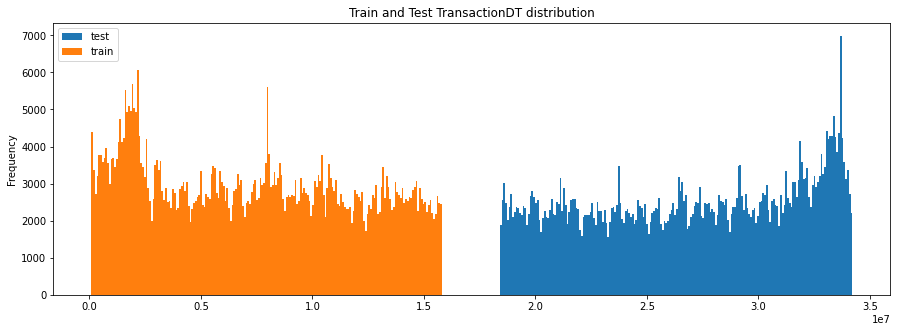

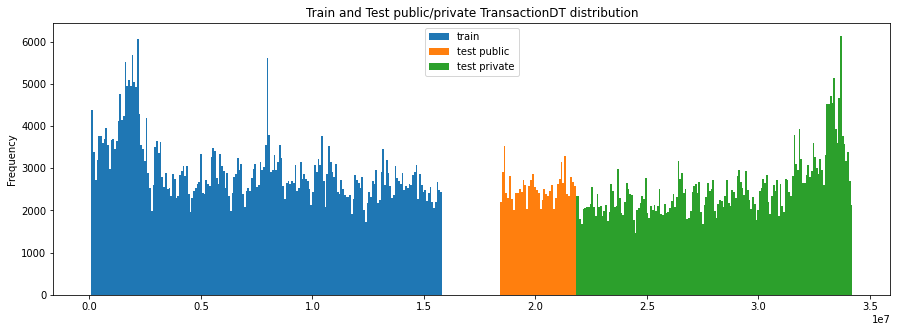

,Column,Correlation with TransactionDT
0,TransactionDT,1.000000
1,TransactionID,0.998280
2,V330,0.258603
3,V326,0.257295
4,V329,0.252599
5,V327,0.248494
375,V145,-0.252731
376,V160,-0.265566
377,V159,-0.279138
378,V151,-0.280576


In [ ]:
COL = 'TransactionDT'
h('<h2 id="c_' + COL + '">' + COL + '</h2>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')

te['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='test', bins=200, title='Train and Test TransactionDT distribution')
tr['TransactionDT'].plot(kind='hist', label='train', bins=200)
plt.legend()
plt.show()
tr['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='train', bins=200, title='Train and Test public/private TransactionDT distribution')
n_public = int(te.shape[0] * 0.2)
te.loc[:n_public, 'TransactionDT'].plot(kind='hist', label='test public', bins=40)
te.loc[n_public:, 'TransactionDT'].plot(kind='hist', label='test private', bins=160)
plt.legend()
plt.show()
corr1(COL)

In [ ]:
COL = 'isFraud'
h('<h2 id="c_' + COL + '">' + COL + '</h2>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
h('This is target column.')
trx = tr['isFraud'].value_counts().reset_index().rename({'index':'Value','isFraud':'Count'}, axis=1)
trx['Share'] = np.round(trx['Count'] / trx['Count'].sum(), 6)
display(trx)
corr1(COL)

In [ ]:
for col in list(tr.columns.values[:COLS_TO_SHOW]):
    proc(col)

### Các cột V và ID
Tác giả nhận thấy các cột thuộc tính V khá dư thừa, không đem lại nhiều thông tin mới và có tương quan (correlated) với nhau.

#### Prepare Data

In [ ]:
#!gdown https://drive.google.com/uc?id=1x6xmQifUHQWZi7nDJs53do1G4q5aEnWI&export=download
#!unzip ieee-fraud-detection.zip

#### Import thư viện

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np,gc # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

In [ ]:
cols_t = ['TransactionID', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9']
cols_v = ['V'+str(x) for x in range(1,340)]; types_v = {}
for c in cols_v: types_v[c] = 'float32'
train = pd.read_csv(INPUT_DIR+'train_transaction.csv',usecols=cols_t+['isFraud']+cols_v,dtype=types_v)

#### NAN search
Tìm kiếm tất cả các cột thuộc tính trong train_transaction.csv có số lượng giá trị NAN giống với các cột V, sau đó gom thành các block tương ứng với mỗi giá trị NAN.

In [ ]:
nans_df = train.isna()
nans_groups={}
i_cols = ['V'+str(i) for i in range(1,340)]
for col in train.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
del nans_df; x=gc.collect()

for k,v in nans_groups.items():
    print('####### NAN count =',k)
    print(v)

####### NAN count = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 8933
['card2']
####### NAN count = 1565
['card3']
####### NAN count = 1577
['card4']
####### NAN count = 4259
['card5']
####### NAN count = 1571
['card6']
####### NAN count = 65706
['addr1', 'addr2']
####### NAN count = 352271
['dist1']
####### NAN count = 552913
['dist2']
####### NAN count = 94456
['P_emaildomain']
####### NAN count = 453249
['R_emaildomain']
####### NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 280797
['D2']
####### NAN count = 262878
['D3']
####### NAN count = 168922
['D4']
####### NAN count = 309841
['D5']
####### NAN count = 517353
['D6']
####### NAN count = 551623
['D7']
####### NAN count = 515614
['D8', 'D9']
####### NAN count = 76022
['D10']
####### NAN count = 27

Theo như kết quả trên, ví dụ ở đây ta có được một số block như  D1 và [V281-V135] , D11 và [V1 - V11], hay các block gồm các cột V tương tự nhau về số lượng giá trị NAN như [V35 -V52], [V75-94], ...

#### Giảm số lượng cột V cho mỗi block

##### V1-V11,D11

In [ ]:
Vc = ['dayr','isFraud','TransactionAmt','card1','addr1','D1n','D11n']
Vs = nans_groups[279287]
Vtitle = 'V1 - V11, D11'

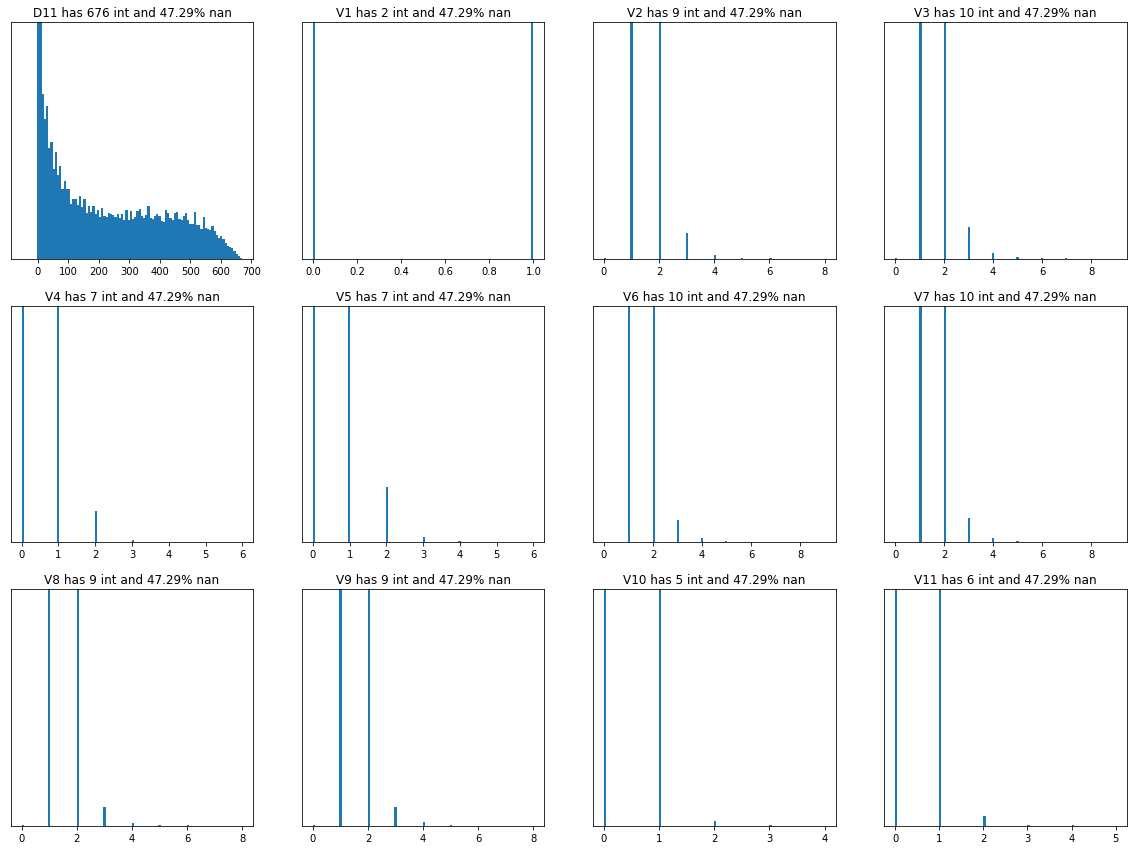

In [ ]:
def make_plots(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    idx = train[~train[Vs[0]].isna()].index
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        n = train[v].nunique()
        x = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train[v].isna())/len(train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots(Vs)

Tính correlation giữa các cột V trong block.

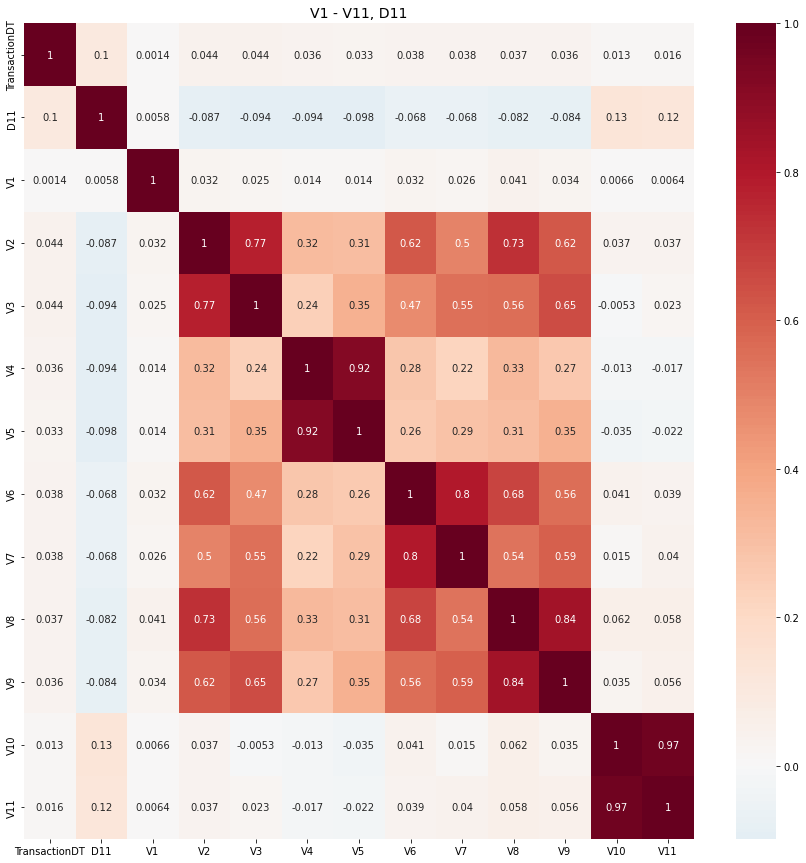

In [ ]:
# Tính độ tương quan correlate giữa các cột thuộc tính
def make_corr(Vs,Vtitle=''):
    cols = ['TransactionDT'] + Vs
    plt.figure(figsize=(15,15))
    sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Vtitle!='': plt.title(Vtitle,fontsize=14)
    else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()
make_corr(Vs,Vtitle)

Trong mỗi block, tiến hành giảm số lượng cột V trong block, bằng cách chỉ giữ lại cột V có nhiều giá trị nunique nhất trong mỗi nhóm correlated.

In [ ]:
grps = [[1],[2,3],[4,5],[6,7],[8,9],[10,11]]
def reduce_group(grps,c='V'):
    use = []
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = train[c+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
            #print(str(gg)+'-'+str(n),', ',end='')
        use.append(vx)
        #print()
    print('Use these',use)
reduce_group(grps)

Use these [1, 3, 4, 6, 8, 11]


Các cột trong block [V1-V11] sẽ được thay thế bằng các cột:

{ V1,V3, V4, V6, V8, V11}

##### V12 - V34

In [ ]:
Vs = nans_groups[76073]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
reduce_group(grps)

Use these [13, 14, 17, 20, 23, 26, 27, 30]


##### V35 - V52

In [ ]:
Vs = nans_groups[168969]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
reduce_group(grps)

Use these [36, 37, 40, 41, 44, 47, 48]


##### V53 - V74

In [ ]:
Vs = nans_groups[77096]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
reduce_group(grps)

Use these [54, 56, 59, 62, 65, 67, 68, 70]


##### V75 - V94

In [ ]:
Vs = nans_groups[89164]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[75,76],[77,78],[79,80,81,84,85,92,93,94],[82,83],[86,87],[88],[89],[90,91]]
reduce_group(grps)

Use these [76, 78, 80, 82, 86, 88, 89, 91]


##### V95 - V137

In [ ]:
Vs = nans_groups[314]
make_corr(Vs)

In [ ]:
Vs = ['V'+str(x) for x in range(95,107)]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[95,96,97,101,102,103,105,106],[98],[99,100],[104]]
reduce_group(grps)

Use these [96, 98, 99, 104]


In [ ]:
Vs = ['V'+str(x) for x in range(107,124)]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[107],[108,109,110,114],[111,112,113],[115,116],[117,118,119],[120,122],[121],[123]]
reduce_group(grps)

Use these [107, 108, 111, 115, 117, 120, 121, 123]


In [ ]:
Vs = ['V'+str(x) for x in range(124,138)]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[124,125],[126,127,128,132,133,134],[129],[130,131],[135,136,137]]
reduce_group(grps)

Use these [124, 127, 129, 130, 136]


##### V138 ~ V163

In [ ]:
Vs = nans_groups[508595]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[138],[139,140],[141,142],[146,147],[148,149,153,154,156,157,158],[161,162,163]]
reduce_group(grps)

Use these [138, 139, 142, 147, 156, 162]


##### V143 ~ V166

In [ ]:
Vs = nans_groups[508589]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[143,164,165],[144,145,150,151,152,159,160],[166]]
reduce_group(grps)

Use these [165, 160, 166]


##### V167 ~ V216

In [ ]:
Vs = [x for x in nans_groups[450909]]
make_corr(Vs)

In [ ]:
Vs = [x for x in nans_groups[450909] if int(x[1:])<186]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[167,168,177,178,179],[172,176],[173],[181,182,183]]
reduce_group(grps)

Use these [178, 176, 173, 182]


In [ ]:
Vs = [x for x in nans_groups[450909] if (int(x[1:])>183)]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[186,187,190,191,192,193,196,199],[202,203,204,211,212,213],[205,206],[207],[214,215,216]]
reduce_group(grps)

Use these [187, 203, 205, 207, 215]


##### V169 ~ V210

In [ ]:
Vs = nans_groups[450721]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[169],[170,171,200,201],[174,175],[180],[184,185],[188,189],[194,195,197,198],[208,210],[209]]
reduce_group(grps)

Use these [169, 171, 175, 180, 185, 188, 198, 210, 209]


##### V217 ~ V278

In [ ]:
Vs = [x for x in nans_groups[460110]]
make_corr(Vs)

In [ ]:
Vs = [x for x in nans_groups[460110] if int(x[1:])<240]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[217,218,219,231,232,233,236,237],[223],[224,225],[226],[228],[229,230],[235]]
reduce_group(grps)

Use these [218, 223, 224, 226, 228, 229, 235]


In [ ]:
Vs = [x for x in nans_groups[460110] if (int(x[1:])>237)&(int(x[1:])<263)]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[240,241],[242,243,244,258],[246,257],[247,248,249,253,254],[252],[260],[261,262]]
reduce_group(grps)

Use these [240, 258, 257, 253, 252, 260, 261]


In [ ]:
Vs = [x for x in nans_groups[460110] if (int(x[1:])>262)]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[263,265,264],[266,269],[267,268],[273,274,275],[276,277,278]]
reduce_group(grps)

Use these [264, 266, 267, 274, 277]


##### V220 ~ V272

In [ ]:
Vs = nans_groups[449124]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[220],[221,222,227,245,255,256,259],[234],[238,239],[250,251],[270,271,272]]
reduce_group(grps)

Use these [220, 221, 234, 238, 250, 271]


##### V279 ~ V321

In [ ]:
Vs = [x for x in nans_groups[12]]
make_corr(Vs)

In [ ]:
Vs = [x for x in nans_groups[12] if int(x[1:])<302]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[279,280,293,294,295,298,299],[284],[285,287],[286],[290,291,292],[297]]
reduce_group(grps)

Use these [294, 284, 285, 286, 291, 297]


In [ ]:
Vs = [x for x in nans_groups[12] if int(x[1:])>299]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[302,303,304],[305],[306,307,308,316,317,318],[309,311],[310,312],[319,320,321]]
reduce_group(grps)

Use these [303, 305, 307, 309, 310, 320]


##### V281 ~ V315, D1

In [ ]:
Vs = nans_groups[1269]
make_plots(Vs)
Vtitle = 'V281 - V315, D1'
make_corr(Vs,Vtitle)

In [ ]:
grps = [[281],[282,283],[288,289],[296],[300,301],[313,314,315]]
reduce_group(grps)

Use these [281, 283, 289, 296, 301, 314]


##### V322 - V339

In [ ]:
Vs = nans_groups[508189]
make_plots(Vs)
make_corr(Vs)

In [ ]:
grps = [[322,323,324,326,327,328,329,330,331,332,333],[325],[334,335,336],[337,338,339]]
reduce_group(grps)

Use these [332, 325, 335, 338]


#### Biểu diễn các cột thuộc tính

##### V reduced

Ta còn lại 128 cột thuộc tính V

In [ ]:
v =  [1, 3, 4, 6, 8, 11]
v += [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
v += [76, 78, 80, 82, 86, 88, 89, 91]
v += [96, 98, 99, 104]
v += [107, 108, 111, 115, 117, 120, 121, 123]
v += [124, 127, 129, 130, 136]
v += [138, 139, 142, 147, 156, 162]
v += [165, 160, 166]
v += [178, 176, 173, 182]
v += [187, 203, 205, 207, 215]
v += [169, 171, 175, 180, 185, 188, 198, 210, 209]
v += [218, 223, 224, 226, 228, 229, 235]
v += [240, 258, 257, 253, 252, 260, 261]
v += [264, 266, 267, 274, 277]
v += [220, 221, 234, 238, 250, 271]
v += [294, 284, 285, 286, 291, 297]
v += [303, 305, 307, 309, 310, 320]
v += [281, 283, 289, 296, 301, 314]
v += [332, 325, 335, 338]

In [ ]:
print('Reduced set has',len(v),'columns')

Reduced set has 128 columns


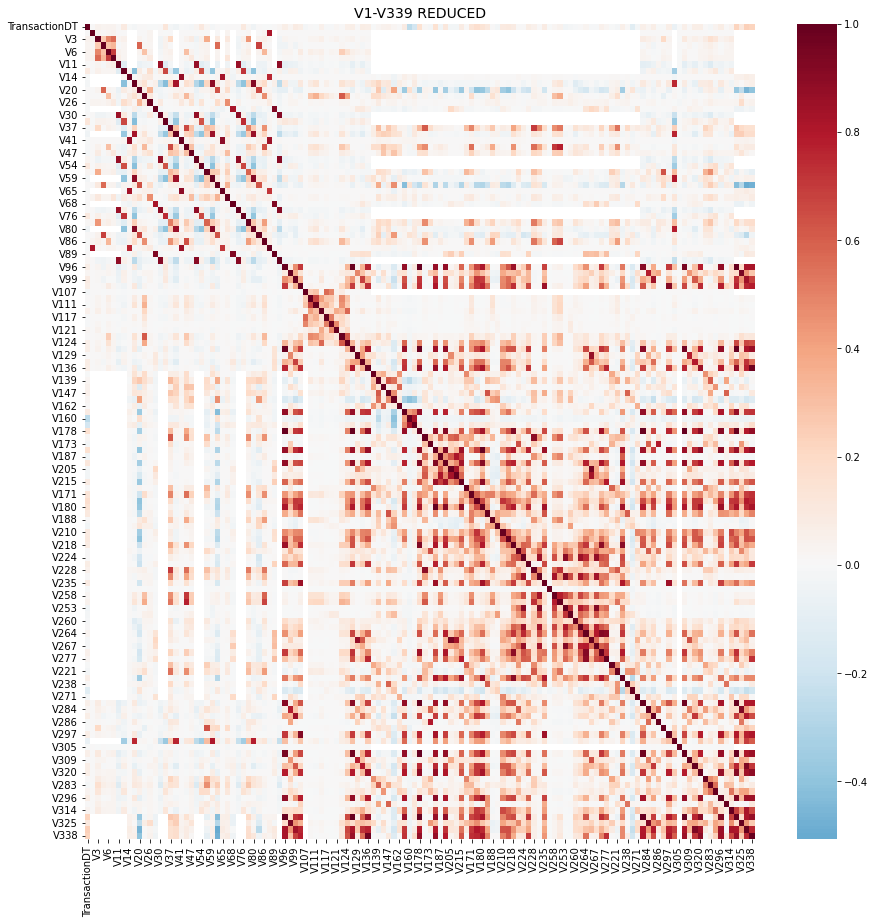

In [ ]:
cols = ['TransactionDT'] + ['V'+str(x) for x in v]
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 REDUCED',fontsize=14)
plt.show()

##### V all

In [ ]:
cols = ['TransactionDT'] + ['V'+str(x) for x in range(1,340)]
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15,15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 ALL',fontsize=14)
plt.show()

Ta có thể nhận thấy rằng 100 cột V đầu tiên không tương quan nhiều với 239 cột V cuối cùng. 

Ngoài ra, mặc dù có 6 nhóm NAN khác nhau trong 100 cột V đầu tiên nhưng có nhiều mối tương quan giữa các nhóm này; tương tự, 239 cột V sau có liên quan đến nhau.

##### C columns

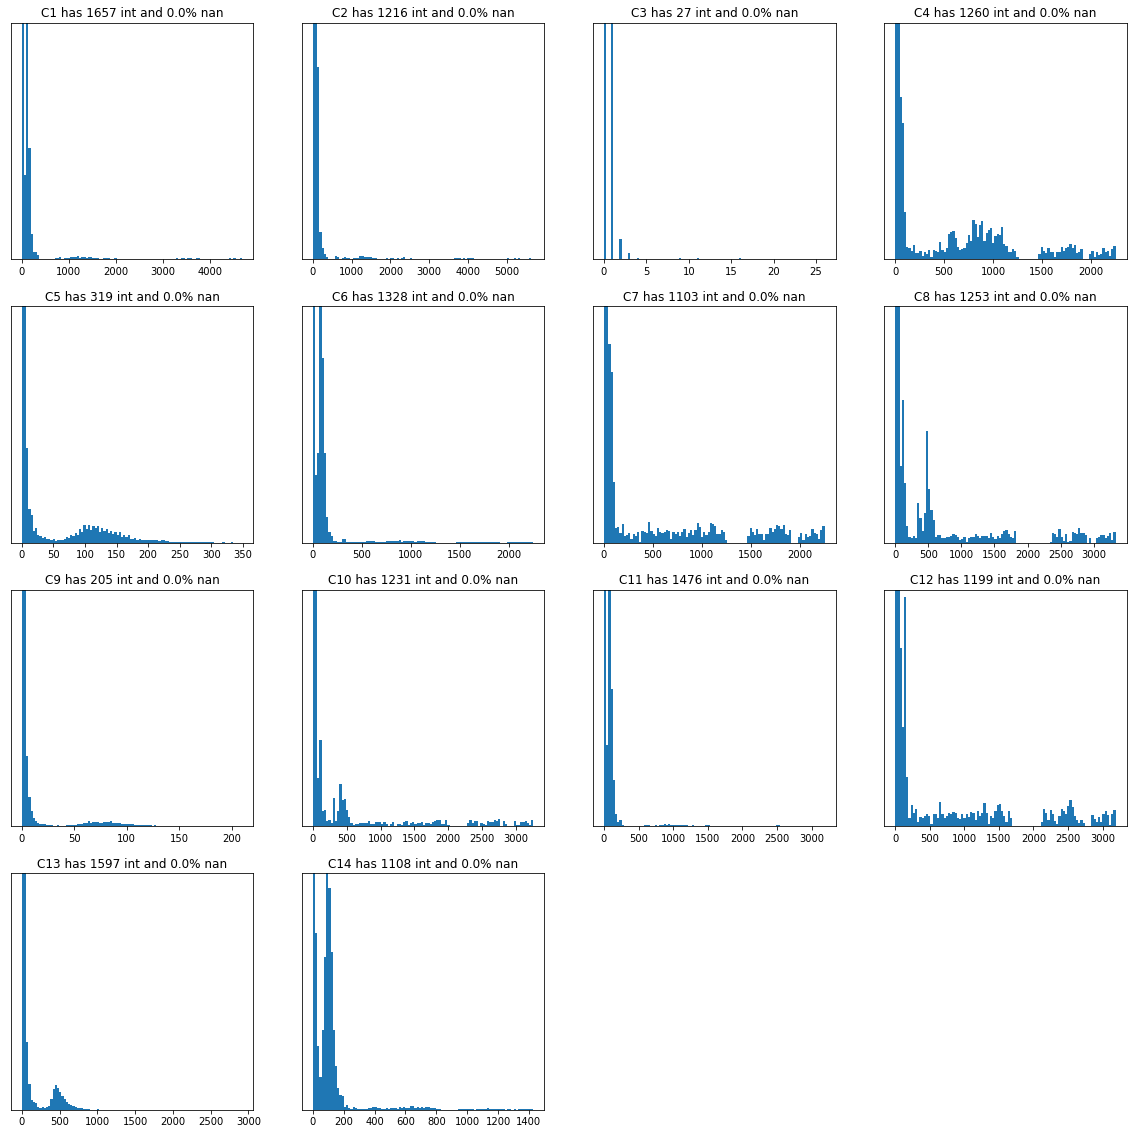

In [ ]:
def make_plots2(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        idx = train[~train[v].isna()].index
        n = train[v].nunique()
        x = np.sum(train.loc[idx,v]!=train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train[v].isna())/len(train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots2(['C'+str(x) for x in range(1,15)])

In [ ]:
cols = ['TransactionDT'] + ['C'+str(x) for x in range(1,15)]
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('C1-C15')
plt.show()

##### D Columns

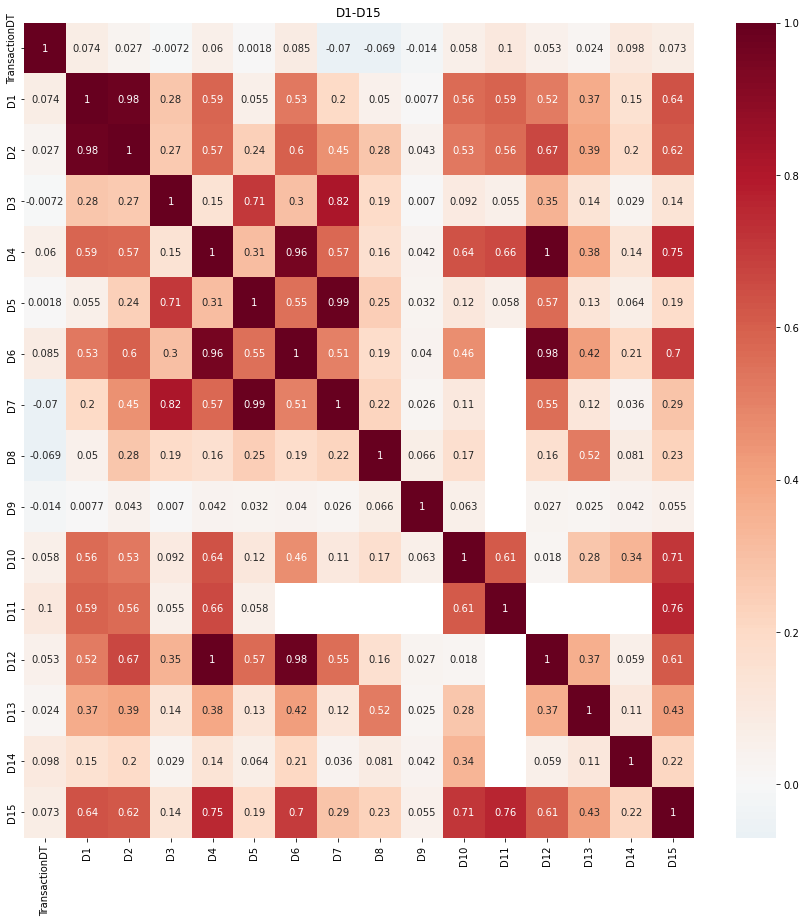

In [ ]:
cols = ['TransactionDT'] + ['D'+str(x) for x in range(1,16)]
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('D1-D15')
plt.show()

##### M Columns

In [ ]:
Ms = ['M'+str(x) for x in range(1,10)]
mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in Ms: train[c] = train[c].map(mp)

In [ ]:
cols = ['TransactionDT'] + Ms
plt.figure(figsize=(15,15))
sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('M1-M9')
plt.show()

##### ID Columns

In [ ]:
train_id = pd.read_csv(INPUT_DIR+'train_identity.csv')
train_id = pd.merge(train_id,train[['TransactionID','TransactionDT']],on='TransactionID',how='left')
ids = ['id_0'+str(x) for x in range(1,10)]+['id_'+str(x) for x in range(10,39)]
for c in ids: print (c,train_id[c].unique()[:10])

In [ ]:
booln = ['id_12','id_15','id_16','id_27','id_28','id_29','id_35','id_36','id_37','id_38']
cats = ['id_23','id_30','id_31','id_33','id_34']
mp = {'Unknown':0,'NotFound':1,'Found':2,'New':3,'F':0,'T':1}
for c in booln: train_id[c] = train_id[c].map(mp)

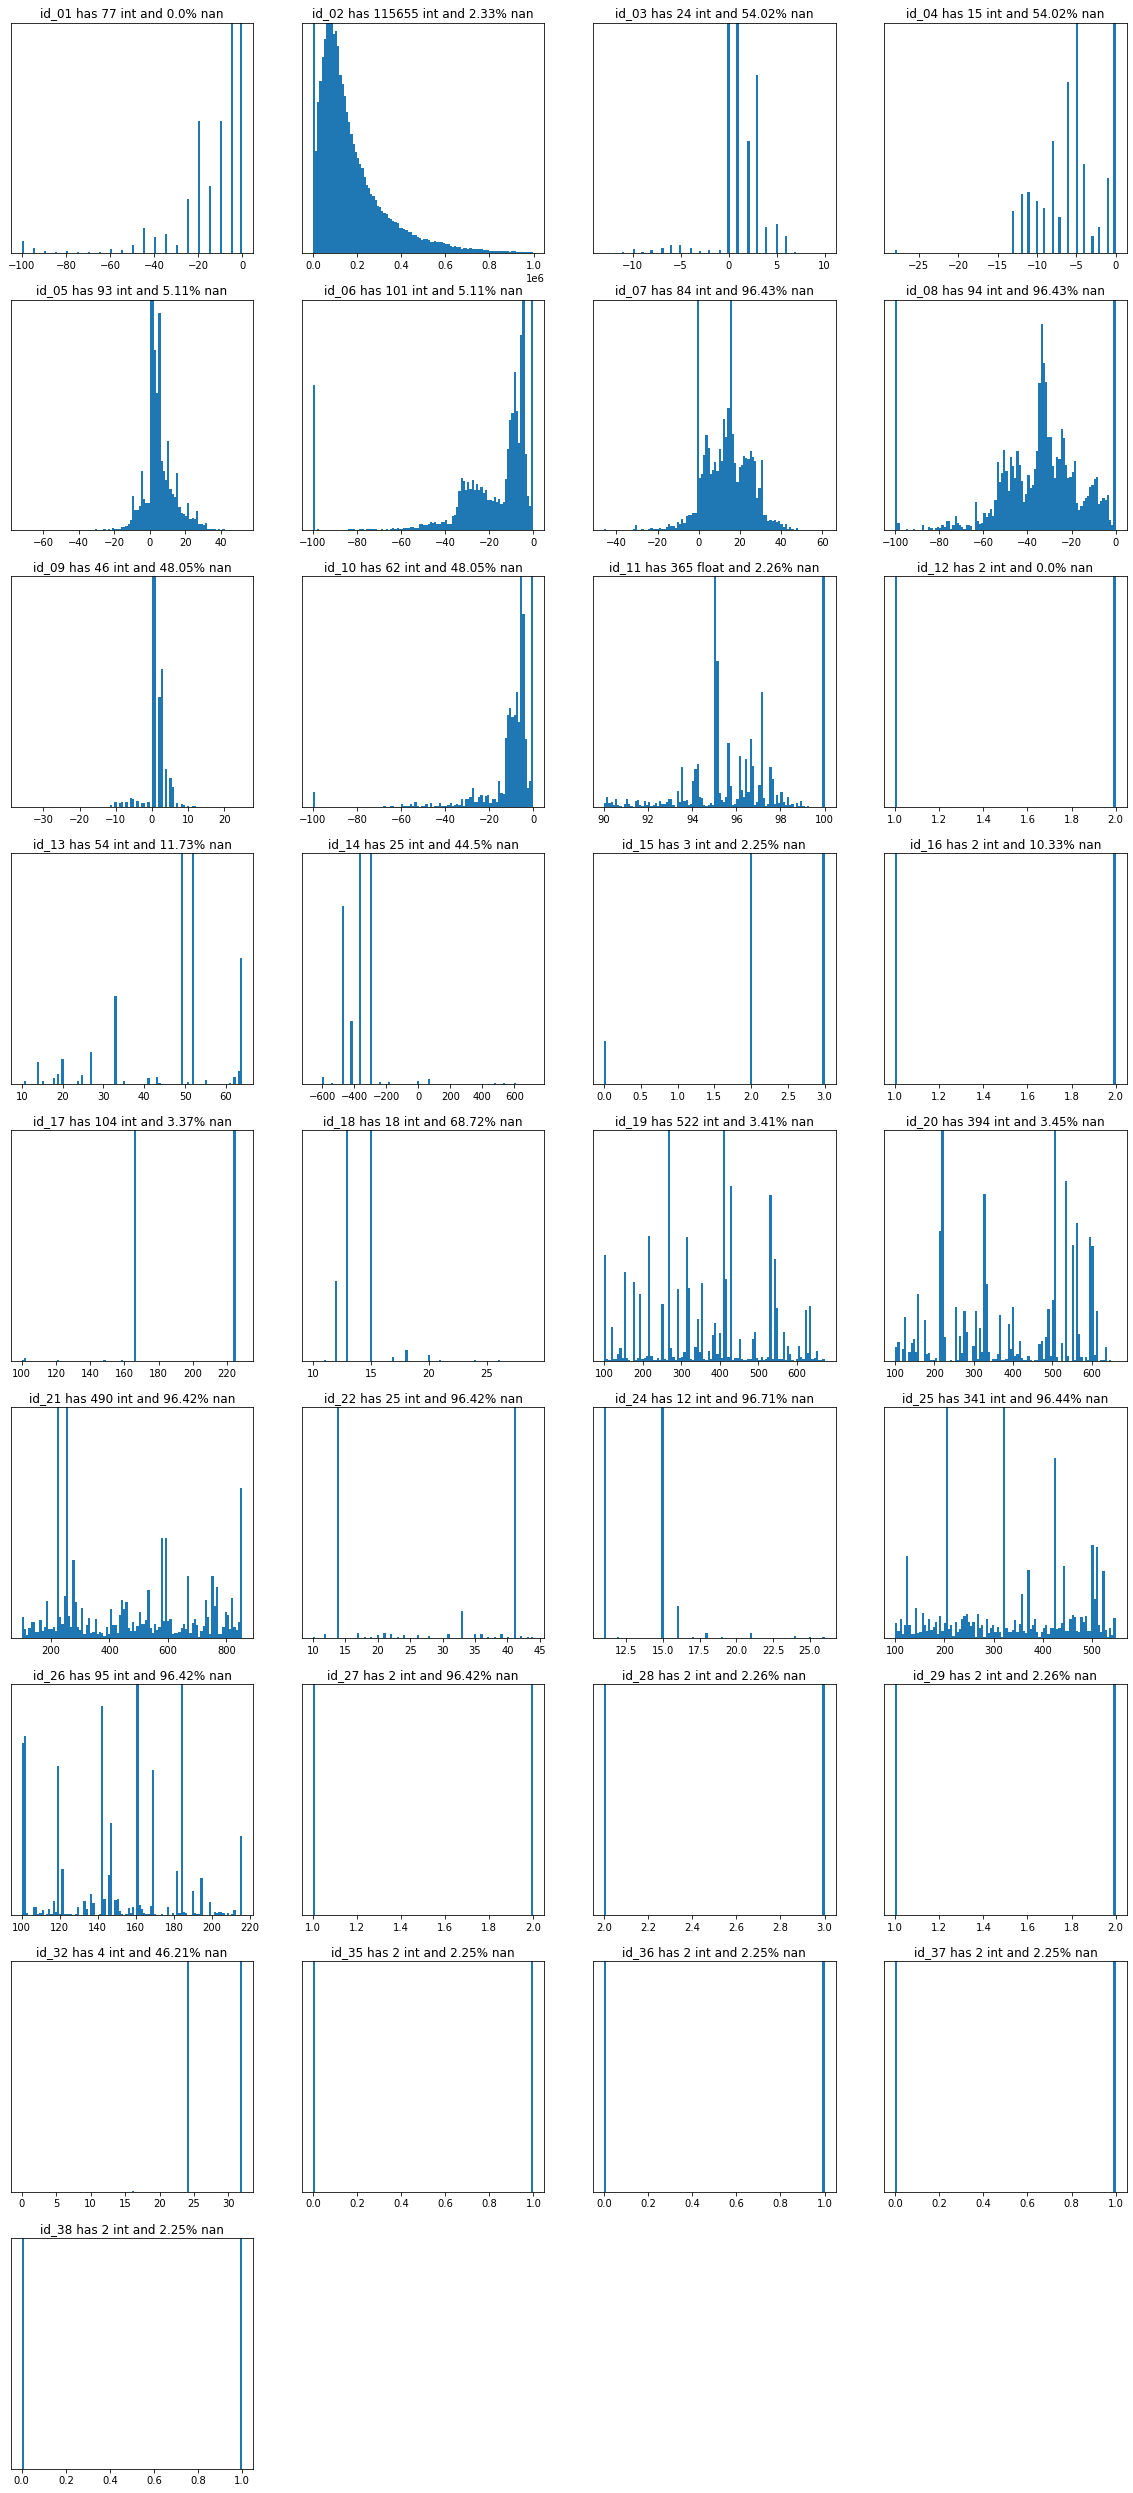

In [ ]:
def make_plots2(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        idx = train_id[~train_id[v].isna()].index
        n = train_id[v].nunique()
        x = np.sum(train_id.loc[idx,v]!=train_id.loc[idx,v].astype(int))
        y = np.round(100*np.sum(train_id[v].isna())/len(train_id),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(train_id.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()
make_plots2([x for x in ids if x not in cats])

In [ ]:
cols = ['TransactionDT'] + [x for x in ids if x not in cats]
plt.figure(figsize=(15,15))
sns.heatmap(train_id[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('ID1-ID38')
plt.show()

### Feature Engineering and Feature Selection

Dưới đây là một số ý tưởng về cách tạo mới và chọn thuộc tính cho mô hình mà nhóm tác giả đã thực hiện:
>Kernel https://www.kaggle.com/kyakovlev/ieee-fe-for-local-test của Konstantin thực hiện các FE for local test và chứng minh các kỹ thuật đó. Mọi người có thể xem để tham khảo thêm
1. Tạo một feature mới và sau đó đánh giá nó bằng các tiến hành xác thực cục bộ (local validation scheme)  để xem liệu nó có cải thiện CV của mô hình hay không. Giữ lại các feature có lợi và loại bỏ các feature khác.
2. Lựa chọn các thuộc tính chuyển tiếp (sử dụng trên một thuộc tính hoặc nhóm các thuộc tính)
3. Loại bỏ thuộc tính đệ quy (sử dụng cho một thuộc tính hoặc nhóm các thuộc tính).
4. Xác đinh tầm quan trọng của thuộc tính bằng cách thực hiện hoán vị các giá trị thuộc tính.
5. Xác thực chéo.
6. Phân tích tương quan các thuộc tính.
7. Tính nhất quán về thời gian.
8. Tính nhất quán của khách hàng.
9. Xem xét sự phân phối của tập dữ liệu thử nghiệm so với tập dữ liệu đào tạo và xem chúng giống và khác nhau như thế nào.

#### Train & Test

>Khi thực hiện mã hóa nhãn, phải mã hóa trên cùng tập dữ liệu Train và Test bằng cách gộp chung dữ liệu lại với nhau.
>
>```python
>df = pd.concat([train[col],test[col]],axis=0) 
># PERFORM FEATURE ENGINEERING HERE
>train[col] = df[:len(train)]   
>test[col] = df[len(train):]
```


#### Xử lý giá trị NAN - NAN Processing


>Nếu ta cung cấp giá trị np.nan cho mô hình, thì tại mỗi lần Tree phân chia, nó sẽ tách các giá trị không phải NAN và sau đó gửi tất cả các NAN đến con trái hoặc con phải tùy thuộc vào điều gì tốt nhất. Do đó, các giá trị NAN được đối xử đặc biệt ở mọi node và có thể trở dẫn đến overfit.
>
>-->Chuyển đổi tất cả NAN thành một số âm thấp hơn tất cả các giá trị không phải NAN (chẳng hạn như - 999) thì mô hình sẽ không ưu tiên xử lý với NAN nữa và dành cho nó sự chú ý giống như những con số khác.Trong bài này tác giả sử dụng giá trị -1.
>```python
>df[col].fillna(-999, inplace=True)
>```

#### Label Encode/ Factorize/ Memory reduction

>Mã hóa nhãn ,chuyển đổi một cột thuộc tính kiểu string, category, object thành kiểu integers. Sau đó, ta có thể chuyển thành kiểu int8, int16 hoặc int32 tùy thuộc vào việc kiểm tra giá trị lớn nhất của cột. Từ đó giúp giảm bộ nhớ lưu trữ và biến các giá trị NAN thành một số.
>```python
>df[col],_ = df[col].factorize() #factorize() function encode the object as an enumerated type or categorical variable.
>if df[col].max()<128: df[col] = df[col].astype('int8')
>elif df[col].max()<32768: df[col] = df[col].astype('int16')
>else: df[col].astype('int32')
>```
>

>Ngoài ra để giảm bộ nhớ, ta sử dụng memory_reducer trên các cột. Một cách tiếp cận đơn giản và an toàn hơn là chuyển đổi tất cả các giá trị kiểu float64 thành float32 và tất cả giá trị kiểu int64 thành int32. (Tốt nhất nên tránh float16 , sử dụng int8 và int16 nếu muốn).
>```python
>for col in df.columns:
>    if df[col].dtype=='float64': 
>       df[col] = df[col].astype('float32')
>    if df[col].dtype=='int64': 
>       df[col] = df[col].astype('int32')
>```


#### Thuộc tính phân loại - Categorical Features


>Với các biến phân loại, nếu ta đã mã hóa các nhãn trước đó, ta sẽ để mô hình xem xét một thuộc tính nào đó nếu thuộc kiểu 'categorical' hay 'numeric' thì tốt hơn đối với mô hình. Từ đó quyết định thuộc tính nào tốt nhất dưới dạng số và tính năng nào tốt nhất ở dạng phân loại. 

#### Chia tách - Splitting

>Một cột kiểu string/numeric có thể được tách thành hai cột mới.
>
>Ví dụ, một cột feature kiểu string chẳng hạn như cột 'id_30' có gí trị “ Mac OS X 10_9_5”  có thể được chia thành 2 cột mới là:
>1. "Operating System"  có giá trị "Mac OS X” 
>2. "Version" có giá trị là  “10_9_5”. 
>
>Hoặc ví dụ với cột feature là "TransactionAmt" kiểu numeric có giá trị “ 1230.45” có thể được tách thành 2 cột ( tức là 2 feature mới) :
>1. "USD" có giá trị  “ 1230” 
>2. "Cent" có giá trị  “ 45”


#### Combining / Transforming / Interaction

>Hai cột có kiểu string/ numeric có thể được kết hợp thành một cột mới. 
>
>Ví dụ cột feature "card1" và feature "card2" có thể kết hợp để trở thành một cột feature mới là "uid"
>```python
>df['uid'] = df[‘card1’].astype(str)+’_’+df[‘card2’].astype(str)
>```

>Điều này giúp ích cho mô hình bởi vì bản thân thuộc tính 'card1' và 'card2' có thể không tương quan với target của bài toán ,do đó mô hình sẽ không phân chia các thuộc tính này. Nhưng thuộc tính 'uid = card1_card2' có thể tương quan với target và bây giờ mô hình có thể sử dụng thuộc tính này.
>
> Các cột thuộc tính kiểu số - numeric có thể được kết hợp với nhau bằng các phép cộng, trừ, nhân, v.v. 
>
>ví dụ:
>```python
> df['x1_x2'] = df['x1'] * df['x2']
>```

#### Mã hóa tần suất - Frequency Encoding


>Mã hóa tần số là một kỹ thuật mạnh mẽ cho phép mô hình "nhìn thấy" liệu các giá trị nào đó của thuộc tính là hiếm gặp hay phổ biến. 
>
>Ví dụ: nếu ta tiến hành đếm tần số xuất hiện của tất cả các giá trị cột "card1, mô hình có thể nhận ra giá trị nào của thuộc tính "credit_card" được sử dụng/ xuất hiện thường xuyên.
```python
temp = df['card1'].value_counts().to_dict()
df['card1_counts'] = df['card1'].map(temp)
```

#### Tổng hợp/ thống kê nhóm - Aggregations / Group Statistics

>Cung cấp cho mô hình các giá trị thống kê theo nhóm thuộc tính, cho phép mô hình xác định xem giá trị nào là phổ biến hay hiếm gặp đối với từng nhóm thuộc tính cụ thể.
>```python
>temp = df.groupby('card1')['TransactionAmt'].agg(['mean'])   
>    .rename({'mean':'TransactionAmt_card1_mean'},axis=1)
>df = pd.merge(df,temp,on='card1',how='left')
>```

#### Chuẩn hóa - Normalize / Standardize

>Chuẩn hóa các cột so với chính chúng. Hoặc chuẩn hóa cột này so với một cột khác.
>
>```python
>   # chuẩn hóa trên cột.
>   df[col] = ( df[col]-df[col].mean() ) / df[col].std()
>
>   #chuẩn hóa cột ['D3_remove_time'] từ cột ['D3'] và ['D3_week_mean']  -> loại bỏ sự phụ thuộc theo thời gian>
>   df['D3_remove_time'] = df['D3'] - df['D3_week_mean']
>```

#### Outlier Removal / Relax / Smooth / PCA

>Trong cuộc thi này, tác giả muốn tìm ra điểm bất thường nên tg sử dụng kỹ thuật làm mịn một cách cẩn thận.
>
>Loại bỏ ngoại lệ: xác định và thay thế các giá trị không phổ biến.
>
>Ví dụ: bằng cách sử dụng mã hóa tần suất cho một biến thuộc tính, ta có thể loại bỏ tất cả các giá trị xuất hiện dưới 0,1% bằng cách thay thế chúng bằng một giá trị mới như -9999 (khác giá trị thay cho NAN).

### Các bước thực hiện

#### Load Data
Load tất cả data ngoại trừ 229 V columns đã được tác giả xác định dư thừa thông qua phân tích tương quan như ở trên.

In [ ]:
BUILD95 = True
BUILD96 = True

import numpy as np, pandas as pd, os, gc
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# COLUMNS WITH STRINGS
str_type = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain','M1', 'M2', 'M3', 'M4','M5',
            'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 
            'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
str_type += ['id-12', 'id-15', 'id-16', 'id-23', 'id-27', 'id-28', 'id-29', 'id-30', 
            'id-31', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38']

# FIRST 53 COLUMNS
cols = ['TransactionID', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9']

# V COLUMNS TO LOAD DECIDED BY CORRELATION EDA

cols += ['V'+str(x) for x in v]
dtypes = {}
for c in cols+['id_0'+str(x) for x in range(1,10)]+['id_'+str(x) for x in range(10,34)]+\
    ['id-0'+str(x) for x in range(1,10)]+['id-'+str(x) for x in range(10,34)]:
        dtypes[c] = 'float32'
for c in str_type: dtypes[c] = 'category'

In [ ]:
%%time
# LOAD TRAIN
X_train = pd.read_csv(INPUT_DIR+'train_transaction.csv',index_col='TransactionID', dtype=dtypes, usecols=cols+['isFraud'])
train_id = pd.read_csv(INPUT_DIR+'train_identity.csv',index_col='TransactionID', dtype=dtypes)
X_train = X_train.merge(train_id, how='left', left_index=True, right_index=True)
# LOAD TEST
X_test = pd.read_csv(INPUT_DIR+'test_transaction.csv',index_col='TransactionID', dtype=dtypes, usecols=cols)
test_id = pd.read_csv(INPUT_DIR+'test_identity.csv',index_col='TransactionID', dtype=dtypes)
fix = {o:n for o, n in zip(test_id.columns, train_id.columns)}
test_id.rename(columns=fix, inplace=True)
X_test = X_test.merge(test_id, how='left', left_index=True, right_index=True)
# TARGET
y_train = X_train['isFraud'].copy()
del train_id, test_id, X_train['isFraud']; x = gc.collect()
# PRINT STATUS
print('Train shape',X_train.shape,'test shape',X_test.shape)

Train shape (590540, 221) test shape (506691, 221)
CPU times: user 33.6 s, sys: 510 ms, total: 34.1 s
Wall time: 34.2 s


#### Chuẩn hóa các cột D

Công thức chuẩn hóa cho các giá trị cột D như sau:

 `D15n = Transaction_Day - D15`
 
 `Transaction_Day = TransactionDT/(24*60*60)`. 
 
Các cột thuộc tính D là các khoảng thời gian (timedelta) được tính từ 1 thời điểm nào đó trong quá khứ. 

Nhóm tiến hành transform các cột D thành các ngày cụ thể trong quá khứ. Loại bỏ sự phụ thuộc theo thời gian (đây ko còn là bài toán time series) giá trị của các features D không còn tăng dần theo thời gian nữa.

Ngoài ra, các thuộc tính `D*n` giúp mô hình phân loại khách hàng tốt hơn, sẽ được nói cụ thể ở dưới.

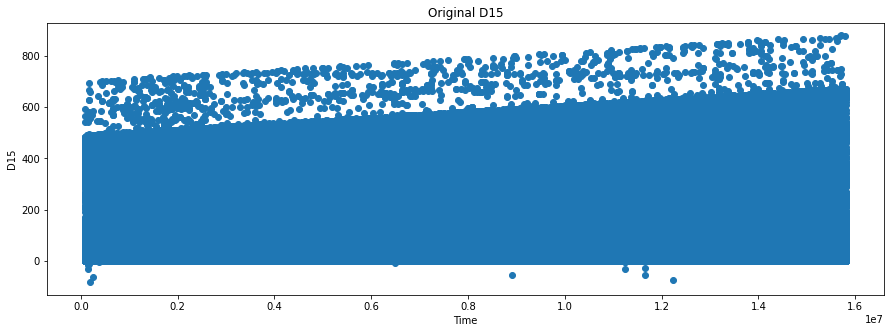

In [ ]:
# PLOT ORIGINAL D
plt.figure(figsize=(15,5))
plt.scatter(X_train.TransactionDT,X_train.D15)
plt.title('Original D15')
plt.xlabel('Time')
plt.ylabel('D15')
plt.show()

In [ ]:
# NORMALIZE D COLUMNS
for i in range(1,16):
    if i in [1,2,3,5,9]: continue
    X_train['D'+str(i)] =  X_train['D'+str(i)] - X_train.TransactionDT/np.float32(24*60*60)
    X_test['D'+str(i)] = X_test['D'+str(i)] - X_test.TransactionDT/np.float32(24*60*60)

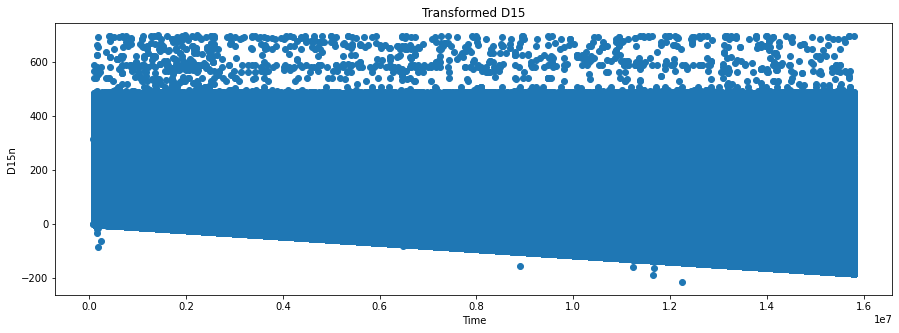

In [ ]:
# PLOT TRANSFORMED D
plt.figure(figsize=(15,5))
plt.scatter(X_train.TransactionDT,X_train.D15)
plt.title('Transformed D15')
plt.xlabel('Time')
plt.ylabel('D15n')
plt.show()

In [ ]:
%%time
# Mã hóa nhãn (label encode) và thực hiện giảm bộ nhớ.
for i,f in enumerate(X_train.columns):
    # Đối với các biến thuộc tính phân loại, đưa về kiểu số.
    if (np.str(X_train[f].dtype)=='category')|(X_train[f].dtype=='object'): 
        df_comb = pd.concat([X_train[f],X_test[f]],axis=0) #nối dữ liệu train và test lại với nhau
        df_comb,_ = df_comb.factorize(sort=True)   # mã hóa và xáo trôn thứ tự dữ liệu
        if df_comb.max()>32000: print(f,'needs int32') #kiểm tra giá trị max để astype kiểu phù hợp
        X_train[f] = df_comb[:len(X_train)].astype('int16')
        X_test[f] = df_comb[len(X_train):].astype('int16')
    # SHIFT ALL NUMERICS POSITIVE. SET NAN to -1
    elif f not in ['TransactionAmt','TransactionDT']:
        mn = np.min((X_train[f].min(),X_test[f].min()))
        X_train[f] -= np.float32(mn)
        X_test[f] -= np.float32(mn)
        X_train[f].fillna(-1,inplace=True) # thay các giá trị NAN = -1
        X_test[f].fillna(-1,inplace=True)  # thay các giá trị NAN = -1

CPU times: user 2.72 s, sys: 13.8 ms, total: 2.73 s
Wall time: 2.73 s


#### Các bước mã hóa

1. `encode_FE` : hàm này thực hiện frequency encode- mã hóa tần suất cho giá trị của các thuộc tính, trong đó ta cần kết hợp dữ liệu train và test trước khi thực hiện mã hóa.
* Input : dữ liệu train, test, các cột thuộc tính cần mã hóa.
* Output: tạo thêm một cột thuộc tính mới - là tần suất của các giá trị trương ứng trong cột thuộc tính input đầu vào.

In [ ]:
# Mã hóa tần số cho thuộc tính
def encode_FE(df1, df2, cols):
    for col in cols:
        df = pd.concat([df1[col],df2[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[col].map(vc)
        df2[nm] = df2[nm].astype('float32')
        print(nm,', ',end='')

2. `encode_LE` : mã hóa nhãn cho các thuộc tính phân loại thành kiểu số nguyên.

In [ ]:
# LABEL ENCODE
def encode_LE(col,train=X_train,test=X_test,verbose=True):
    df_comb = pd.concat([train[col],test[col]],axis=0)
    df_comb,_ = df_comb.factorize(sort=True)
    nm = col
    if df_comb.max()>32000: 
        train[nm] = df_comb[:len(train)].astype('int32')
        test[nm] = df_comb[len(train):].astype('int32')
    else:
        train[nm] = df_comb[:len(train)].astype('int16')
        test[nm] = df_comb[len(train):].astype('int16')
    del df_comb; x=gc.collect()
    if verbose: print(nm,', ',end='')


3. `encode_AG` : tạo các thuộc tính tổng hợp ( theo giá trị trung bình - mean hoặc độ lệch chuẩn - std ) bằng cách thống kê theo nhóm thuộc tính.

In [ ]:
# GROUP AGGREGATION MEAN AND STD
def encode_AG(main_columns, uids, aggregations=['mean'], train_df=X_train, test_df=X_test, 
              fillna=True, usena=False):
    # AGGREGATION OF MAIN WITH UID FOR GIVEN STATISTICS #thống kê theo uid
    for main_column in main_columns: 
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]]) #concat new feature
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan #thay nan vào các gt=-1 (đã đc xử lí trước đó)
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})  

                temp_df.index = list(temp_df[col]) #set index by uid
                temp_df = temp_df[new_col_name].to_dict() # convert to dict 

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')  # map mean_value
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')   # map mean_value
                
                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)
                
                print("'"+new_col_name+"'",', ',end='')
                

4. `encode_CB` : tạo các thuộc tính mới cho mô hình bằng cách kết hợp các thuộc tính lại với nhau. 

In [ ]:
# COMBINE FEATURES (create newfeaturé from 2 colums, then encode label for new_feature)
def encode_CB(col1,col2,df1=X_train,df2=X_test):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str) # kết hợp để tạo feature mới
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str) # kết hợp ............
    encode_LE(nm,verbose=False) #mã háo nhãn  cho feature mới
    print(nm,', ',end='')

5.`encode_AG2`: tạo các thuộc tính tổng hợp với giá trị duy nhất - thống kê số các giá trị khác nhau của mỗi nhóm thuộc tính tổng hợp.

In [ ]:
# GROUP AGGREGATION NUNIQUE
def encode_AG2(main_columns, uids, train_df=X_train, test_df=X_test):
    for main_column in main_columns:  
        for col in uids:
            comb = pd.concat([train_df[[col]+[main_column]],test_df[[col]+[main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

#### Feature Engineering

---


Quy trình: 
* Đầu tiên cần có ý tưởng tạo một feature mới. 
* Sau đó, thêm nó vào mô hình của mình và đánh giá xem AUC tăng hay giảm. Nếu AUC tăng, giữ lại , nếu không thì loại bỏ.



In [ ]:

%%time
# TRANSACTION AMT CENTS 
X_train['cents'] = (X_train['TransactionAmt'] - np.floor(X_train['TransactionAmt'])).astype('float32')  #làm tròn
X_test['cents'] = (X_test['TransactionAmt'] - np.floor(X_test['TransactionAmt'])).astype('float32') #làm tròn
print('cents, ', end='')
# FREQUENCY ENCODE: ADDR1, CARD1, CARD2, CARD3, P_EMAILDOMAIN 
#mã hóa tần suất cho các cột thuộc tính
encode_FE(X_train,X_test,['addr1','card1','card2','card3','P_emaildomain'])
# COMBINE COLUMNS CARD1+ADDR1, CARD1+ADDR1+P_EMAILDOMAIN  
#Combine tạo các cột thuộc tính mới
encode_CB('card1','addr1')
encode_CB('card1_addr1','P_emaildomain')
# FREQUENCY ENOCDE 
# mã hóa tần suất cho các thuộc tính mới
encode_FE(X_train,X_test,['card1_addr1','card1_addr1_P_emaildomain'])
# GROUP AGGREGATE
encode_AG(['TransactionAmt','D9','D11'],['card1','card1_addr1','card1_addr1_P_emaildomain'],['mean','std'],usena=True)

cents, addr1_FE , card1_FE , card2_FE , card3_FE , P_emaildomain_FE , card1_addr1 , card1_addr1_P_emaildomain , card1_addr1_FE , card1_addr1_P_emaildomain_FE , 'TransactionAmt_card1_mean' , 'TransactionAmt_card1_std' , 'TransactionAmt_card1_addr1_mean' , 'TransactionAmt_card1_addr1_std' , 'TransactionAmt_card1_addr1_P_emaildomain_mean' , 'TransactionAmt_card1_addr1_P_emaildomain_std' , 'D9_card1_mean' , 'D9_card1_std' , 'D9_card1_addr1_mean' , 'D9_card1_addr1_std' , 'D9_card1_addr1_P_emaildomain_mean' , 'D9_card1_addr1_P_emaildomain_std' , 'D11_card1_mean' , 'D11_card1_std' , 'D11_card1_addr1_mean' , 'D11_card1_addr1_std' , 'D11_card1_addr1_P_emaildomain_mean' , 'D11_card1_addr1_P_emaildomain_std' , CPU times: user 15.6 s, sys: 7.43 s, total: 23 s
Wall time: 23 s


Tất cả 28 features mới này được chọn bởi vì mỗi features làm tăng giá trị local validation.

#### Feature Selection


##### Tính nhất quán về thời gian

Nhóm tg đã thêm 28 features mới ở trên. Vì vậy,hiện tại chúng ta có 242 features. 

Bây giờ ta sẽ kiểm tra từng feature để theo dõi tính nhất quán về thời gian của thuộc tính đó.


---



Ta xây dựng 242 mô hình - mỗi mô hình tương ứng với 1 thuộc tính.

Mỗi mô hình sẽ được đào tạo vào tháng đầu tiên của dữ liệu đào tạo và sẽ chỉ sử dụng một feature duy nhất. Sau đó, dự đoán kết quả trên tháng cuối cùng của dữ liệu đào tạo. 

Với các feature cho giá trị AUC trên tập train hoặc validation < 0.5 (tức là có một số đặc điểm của feature đó có ở tập train nhưng không có ở tập test), tác giả cho rằng đó là các thuộc tính yếu, loại bỏ và xem giá trị AUC có tăng hay không.

Bằng cách này, ta loại bỏ được 19 cột thuộc tính. Ngoài ra, ta cũng loại bỏ 7 cột D chủ yếu là giá trị NAN.

In [ ]:
#Bỏ các feature  không nhất quán về thời gian và 7 cột D_nan

cols = list( X_train.columns )
cols.remove('TransactionDT') 
for c in ['D6','D7','D8','D9','D12','D13','D14']:
    cols.remove(c) # a lot nan
    
# FAILED TIME CONSISTENCY TEST
for c in ['C3','M5','id_08','id_33']:
    cols.remove(c)
for c in ['card4','id_07','id_14','id_21','id_30','id_32','id_34']:
    cols.remove(c)
for c in ['id_'+str(x) for x in range(22,28)]:
    cols.remove(c)

In [ ]:
print('NOW USING THE FOLLOWING',len(cols),'FEATURES.')
np.array(cols)

NOW USING THE FOLLOWING 224 FEATURES.


array(['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card5',
       'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
       'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8',
       'M9', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17',
       'V20', 'V23', 'V26', 'V27', 'V30', 'V36', 'V37', 'V40', 'V41',
       'V44', 'V47', 'V48', 'V54', 'V56', 'V59', 'V62', 'V65', 'V67',
       'V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89',
       'V91', 'V96', 'V98', 'V99', 'V104', 'V107', 'V108', 'V111', 'V115',
       'V117', 'V120', 'V121', 'V123', 'V124', 'V127', 'V129', 'V130',
       'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V160', 'V162',
       'V165', 'V166', 'V169', 'V171', 'V173', 'V175', 'V176', 'V178',
       'V180', 'V182', 'V185', 'V187', 'V188', 'V198', 'V203', 'V205',
   

##### Xác thực chéo - Local Validation
Xác thực dựa trên thời gian - tháng.

Đánh giá các thuộc tính bằng cách huấn luyện mô hình trên 75% dữ liệu đầu tiên và dự đoán trên 25% dữ liệu cuối cùng.

(Tương đương 4.5 tháng đầu tiên và 1.5 tháng cuối cùng)

In [ ]:
#TRAIN 75% PREDICT 25%
idxT = X_train.index[:3*len(X_train)//4]
idxV = X_train.index[3*len(X_train)//4:]

#### Mô hình XGBoots
Nhóm tác giả xây dựng hai mô hình XGB. 
1. Mô hình đầu tiên không sử dụng "magic feature" tức là "UID" và đạt được điểm LB = 0,95. 
2. Mô hình thứ hai sử dụng "magic feature" UID và đạt được kết quả trên LB = 0,96.

##### **Tổng quan về mô hình**

**Ensemble Methods** :
>Học kết hợp là mô hình học máy trong đó nhiều mô hình "yếu" (weak learner) được đào tạo để giải quyết cùng 1 bài toán và kết hợp thành 1 mô hình mạnh hơn để đạt được kết quả tốt hơn.
<img src="https://github.com/nhung-ng/IEEE-CIS-Fraud-Detection/blob/main/image/EL.jpg?raw=1" alt="EL" width="800">

**Boosting** (thuộc Ensemble Methods):
>Phương pháp xây dựng một loạt các mô hình giống nhau, trong đó các mô hình sau sẽ cố gắng học để hạn chế lỗi của mô hình trước. Mỗi mô hình có thể xem là một base model hay weak learner.

**Gradient boosting** (thuộc Boosting):
>Phương pháp xây dựng một loạt các mô hình giống nhau, trong đó các mô hình sau sẽ cố gắng học để hạn chế lỗi của mô hình trước. 
>
>Thuật toán dựa vào Gradient Descent và mỗi base model thường là một cây quyết định.
>
><img src="https://github.com/nhung-ng/IEEE-CIS-Fraud-Detection/blob/main/image/GD.jpg?raw=1" alt="GD" height="500" width="800">
>
>Với Gradient Boosting, 2 framework phổ biến nhất là XGBoost và LightGBM

**XGBoots**:
><img src="https://github.com/nhung-ng/IEEE-CIS-Fraud-Detection/blob/main/image/XGB.jpg?raw=1" alt="xgb" width="800">
>
>Trong solution này, tác giả sử dụng cả 2 mô hình XGB và LGBM cho kết quả submission cuối cùng, nhưng nhóm chọn XGB để tập trung tìm hiểu vì các thông tin và mô tả mà tác giả cung cấp chủ yếu dựa trên XGB, sẽ dễ tiếp cận hơn với solution.

**Hyperparameters:**

> Một số phương pháp điều chỉnh - tuning các siêu tham số cho mô hình như:
*	Tìm kiếm lưới.
*	Tìm kiếm ngẫu nhiên.
*	Tối ưu hóa Bayes.
*	Tối ưu hóa dựa trên Gradient.
*	Tối ưu hóa tiến hóa  - sử dụng các thuật toán tiến hóa để tìm kiếm không gian của siêu tham số cho một thuật toán nhất định.
*	Dựa trên điểm dừng sớm - early stopping.

**Hyperparameters tuning trong mô hình của tác giả:**

>Tác giả không đề cập đến việc điều chỉnh tham số, vì vậy nhóm sẽ thử xây dựng mô hình với các tham số mà tác giả đã chọn, đồng thời thử điều chỉnh một số tham số quan trọng như:
* n_thread: Số lượng cores của hê thống được sử dụng để chạy model. (Giá trị mặc định là -1, XGBoost sẽ tự động phát hiện và sử dụng tất cả các cores)
* learning_rate. Giá trị mặc định là 0.3.
* max_depth: Độ sâu tối đa của decision tree. Giá trị mặc định là 6.
* n_estimators : số chu trình.
* reg-lambda: L2 regularization. Giá trị mặc định là 1.
* reg-alpha: L1 regularization. Giá trị mặc định là 0.

#### Xây dựng mô hình XGB - "non" UID

In [ ]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

if BUILD95:
    clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist' 
    )
    h = clf.fit(X_train.loc[idxT,cols], y_train[idxT], 
        eval_set=[(X_train.loc[idxV,cols],y_train[idxV])],
        verbose=50, early_stopping_rounds=100)

XGBoost version: 1.5.1
[0]	validation_0-auc:0.81092
[50]	validation_0-auc:0.87622
[100]	validation_0-auc:0.88955
[150]	validation_0-auc:0.90777
[200]	validation_0-auc:0.91807
[250]	validation_0-auc:0.92530
[300]	validation_0-auc:0.93038
[350]	validation_0-auc:0.93301
[400]	validation_0-auc:0.93460
[450]	validation_0-auc:0.93506
[500]	validation_0-auc:0.93548
[550]	validation_0-auc:0.93556
[600]	validation_0-auc:0.93564
[650]	validation_0-auc:0.93550
[685]	validation_0-auc:0.93542


Các thuộc tính quan trọng đối với mô hình : 

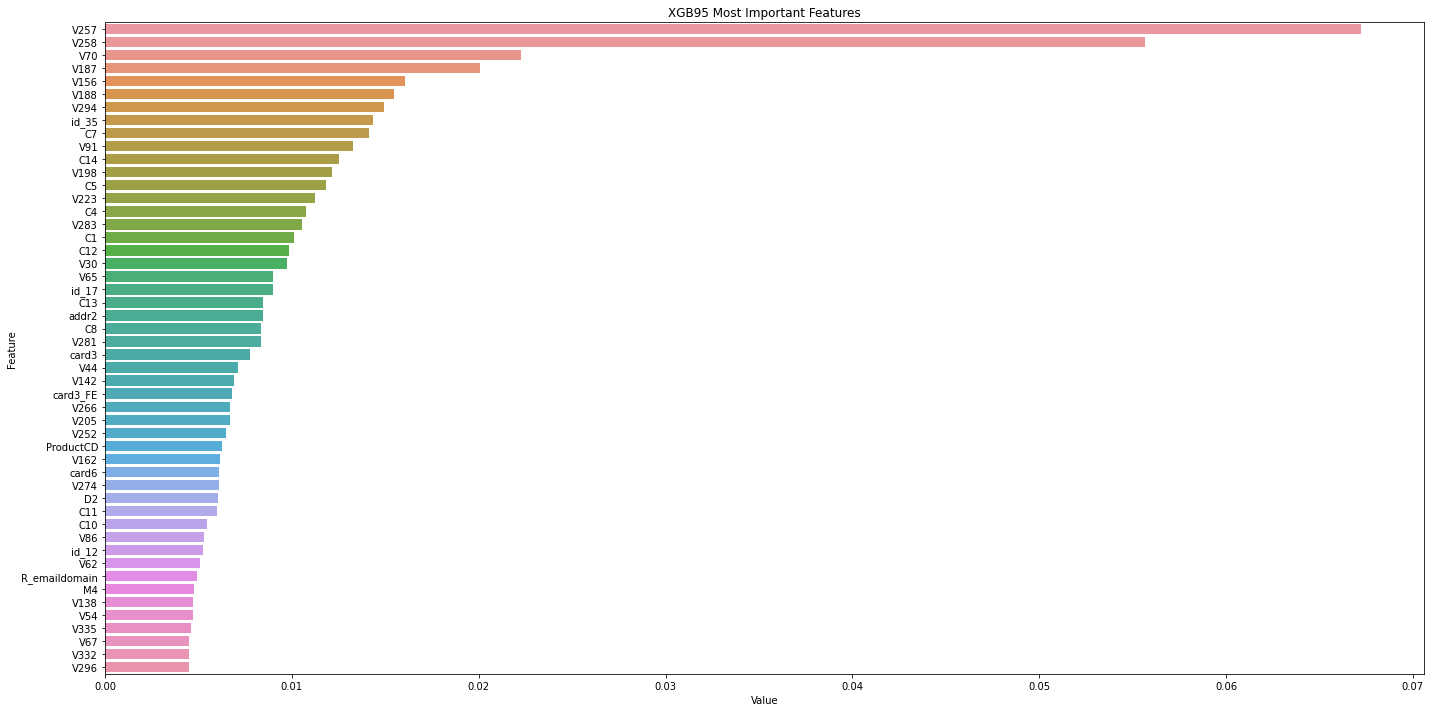

In [ ]:
if BUILD95:
    # Các thuộc tính quan trọng trong mô hình
    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,cols)), columns=['Value','Feature'])
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
    plt.title('XGB95 Most Important Features')
    plt.tight_layout()
    plt.show()
    del clf, h; x=gc.collect()

##### Predict test.csv

---

Dự đoán trên tập test.csv bằng cách sử dụng GroupKFold với các nhóm tương ứng là các tháng. 

Tập train là các dữ liệu trong 6 tháng : tháng tháng 12 năm 2017, tháng 1 năm 2018, tháng 2 năm 2018, tháng 3 năm 2018, tháng 4 năm 2018 và tháng 5 năm 2018. 

Tác giả gọi các tháng này tương ứng là 12, 13, 14, 15, 16, 17, đào tạo trên tháng 13 đến tháng 17 và dự đoán tháng 12.

In [ ]:
# Chuẩn bị dữ liệu phân chia theo tháng

import datetime
START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')
X_train['DT_M'] = X_train['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
X_train['DT_M'] = (X_train['DT_M'].dt.year-2017)*12 + X_train['DT_M'].dt.month 

X_test['DT_M'] = X_test['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
X_test['DT_M'] = (X_test['DT_M'].dt.year-2017)*12 + X_test['DT_M'].dt.month 

Nhiều phương án dự đoán khác đã được thử nhưng GroupKFold hoạt động tốt nhất đối với tập dữ liệu này.

**Cross Validation - GroupKFold**

KFold: chia tập dữ liệu thành k phần khác nhau cho mỗi lần lặp lại bằng cách sử dụng một nhóm để kiểm tra và những nhóm khác để đào tạo.

**GroupKFold** là biến thể của KFold, trong đó mỗi lần lặp sẽ không có sự chồng chéo dữ liệu:
* Cùng một nhóm-group sẽ không xuất hiện trong hai folds khác nhau (số lượng các nhóm riêng biệt phải tối thiểu bằng số folds).
* Số lượng các nhóm trong mỗi fold phải xấp xỉ gần bằng nhau.

**=>** Điều này đảm bảo rằng cùng một nhóm không được đại diện trong cả tập thử nghiệm và huấn luyện.


**Áp dụng GroupKFold vào mô hình**

Chia tập train thành 6 fold nhỏ hơn để tiến hành huấn luyện và xác thực chéo lẫn nhau bằng cách truyền tham số cho GroupKFold  với n_splits = 6. 

Dữ liệu tập train sẽ được chia làm 6 phần riêng biệt.

Mô hình sẽ tiến hành train 6 lần, với mỗi lần thì sẽ dùng 1 fold làm tập validation và 5 fold còn lại làm dữ liệu để training (trong đó không có cùng một khách hàng nào xuất hiện trong fold_validation và folds_training).

Kết quả đánh giá cho model là trung bình cộng của 6 lần train.


In [ ]:
if BUILD95:
    oof = np.zeros(len(X_train))
    preds = np.zeros(len(X_test))

    skf = GroupKFold(n_splits=6)
    for i, (idxT, idxV) in enumerate( skf.split(X_train, y_train, groups=X_train['DT_M']) ):
        month = X_train.iloc[idxV]['DT_M'].iloc[0]
        print('Fold',i,'withholding month',month)
        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))
        clf = xgb.XGBClassifier(
            n_estimators=5000,
            max_depth=12,
            learning_rate=0.02,
            subsample=0.8,
            colsample_bytree=0.4,
            missing=-1,
            eval_metric='auc',
            # USE CPU
            #nthread=4,
            #tree_method='hist'
            # USE GPU
            tree_method='gpu_hist' 
        )        
        h = clf.fit(X_train[cols].iloc[idxT], y_train.iloc[idxT], 
                eval_set=[(X_train[cols].iloc[idxV],y_train.iloc[idxV])],
                verbose=100, early_stopping_rounds=200)
    
        oof[idxV] += clf.predict_proba(X_train[cols].iloc[idxV])[:,1]
        preds += clf.predict_proba(X_test[cols])[:,1]/skf.n_splits
        del h, clf
        x=gc.collect()
    print('#'*20)
    print ('XGB95 OOF CV=',roc_auc_score(y_train,oof))

Fold 0 withholding month 12
 rows of train = 453219 rows of holdout = 137321
[0]	validation_0-auc:0.80039
[100]	validation_0-auc:0.87383
[200]	validation_0-auc:0.89134
[300]	validation_0-auc:0.90082
[400]	validation_0-auc:0.90480
[500]	validation_0-auc:0.90648
[600]	validation_0-auc:0.90724
[700]	validation_0-auc:0.90658
[795]	validation_0-auc:0.90678
Fold 1 withholding month 15
 rows of train = 488908 rows of holdout = 101632
[0]	validation_0-auc:0.83347
[100]	validation_0-auc:0.90390
[200]	validation_0-auc:0.93094
[300]	validation_0-auc:0.94124
[400]	validation_0-auc:0.94533
[500]	validation_0-auc:0.94662
[600]	validation_0-auc:0.94673
[700]	validation_0-auc:0.94682
[800]	validation_0-auc:0.94684
[900]	validation_0-auc:0.94634
[911]	validation_0-auc:0.94631
Fold 2 withholding month 13
 rows of train = 497955 rows of holdout = 92585
[0]	validation_0-auc:0.83768
[100]	validation_0-auc:0.90063
[200]	validation_0-auc:0.92410
[300]	validation_0-auc:0.93600
[400]	validation_0-auc:0.94030
[

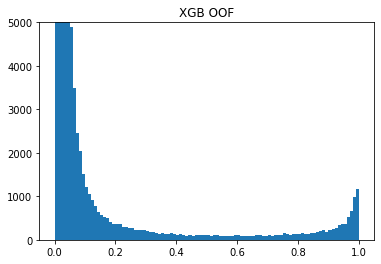

In [ ]:
if BUILD95:
    plt.hist(oof,bins=100)
    plt.ylim((0,5000))
    plt.title('XGB OOF')
    plt.show()

    X_train['oof'] = oof
    X_train.reset_index(inplace=True)
    X_train[['TransactionID','oof']].to_csv('oof_xgb_95.csv')
    X_train.set_index('TransactionID',drop=True,inplace=True)
    
else: X_train['oof'] = 0

Kết quả : AUC trên tập validation = 0.9409139179894693

##### Kaggle Submission File XGB_95

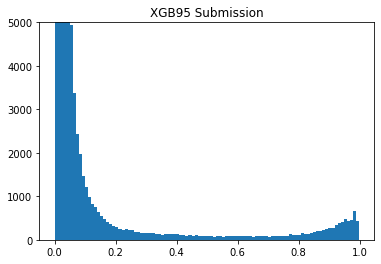

In [ ]:
if BUILD95:
    sample_submission = pd.read_csv(INPUT_DIR+'sample_submission.csv')
    sample_submission.isFraud = preds
    sample_submission.to_csv('sub_xgb_95.csv',index=False)

    plt.hist(sample_submission.isFraud,bins=100)
    plt.ylim((0,5000))
    plt.title('XGB95 Submission')
    plt.show()

#### Xây dựng mô hình XGB - used UID

##### The Magic Feature - UID
**Cách hoạt động**
* Bước 1: Chúng ta cần tạo ra cột UID để định danh khách hàng
* Bước 2: Tạo ra các tính năng tổng hợp nhóm  (Nhóm theo UID)
* Bước 3: Xóa đi cột UID

Giả sử chúng ta có 10 giao dịch `A, B, C, D, E, F, G, H, I, J` như hình bên dưới.  
  
<img src="https://github.com/trandaitai327/IEEE-CIS-Fraud-Detection/blob/main/image/table.jpg?raw=1" alt="table" width="700">


Nếu chỉ sử dung FeatureX. 
Chúng ta dự đoán đúng được 7 trên 10 giao dịch như hình bên dưới
 
 
<img src="https://github.com/trandaitai327/IEEE-CIS-Fraud-Detection/blob/main/image/tran.jpg?raw=1" alt="tran" height ="600" width="700">
  
  
Nếu có thêm cột UID, chúng ta có thể tạo ra cột GroupX bằng cách lấy trung bình FeatureX theo UID. 

Chúng ta có thể dự đoán đúng 100% các giao dịch.
  
  
<img src="https://github.com/trandaitai327/IEEE-CIS-Fraud-Detection/blob/main/image/cred.jpg?raw=1" alt="cred" height = "500" width="700">

##### Tạo thuộc tính UID
Đầu tiên, một UID sẽ giúp mô hình tìm thấy khách hàng (credit card).

Thực hiện tạo một thuộc tính UID mới để giúp mô hình nhận biết được các khách hành.

In [ ]:
X_train['day'] = X_train.TransactionDT / (24*60*60) #Chuẩn hóa đưa về khoảng thời gian tính theo ngày
X_train['uid'] = X_train.card1_addr1.astype(str)+'_'+np.floor(X_train.day-X_train.D1).astype(str) #Tạo thuộc tính "UID"

X_test['day'] = X_test.TransactionDT / (24*60*60)
X_test['uid'] = X_test.card1_addr1.astype(str)+'_'+np.floor(X_test.day-X_test.D1).astype(str)

UID này không hoàn hảo. Nhiều giá trị UID chứa 2 hoặc nhiều khách hàng bên trong. Tuy nhiên, mô hình của này sẽ phát hiện điều này và bằng cách thêm các splits trên cây, điều này giúp tách các UID và tìm ra khách hàng riêng lẻ duy nhất bên trong UID đó. 

Để làm được điều đó ta cần các thuộc tính tổng hợp để phân loại khách hàng.

##### Tổng hợp thuộc tính - Group Aggregation Features
Cần tạo nhiều thuộc tính tổng hợp mới theo giá trị trung bình/ độ lệch chuẩn/nunique thông qua "UID". 

Điều này giúp phân loại khách hàng.

Cụ thể ta thêm 47 thuộc tính tổng hợp mới.
>Lưu ý rằng sau khi tổng hợp, xóa UID khỏi mô hình, không sử dụng trực tiếp UID.

In [ ]:
#Tổng hợp thuộc tính

%%time
# FREQUENCY ENCODE UID
encode_FE(X_train,X_test,['uid'])
# AGGREGATE 
encode_AG(['TransactionAmt','D4','D9','D10','D15'],['uid'],['mean','std'],fillna=True,usena=True)
# AGGREGATE
encode_AG(['C'+str(x) for x in range(1,15) if x!=3],['uid'],['mean'],X_train,X_test,fillna=True,usena=True)
# AGGREGATE
encode_AG(['M'+str(x) for x in range(1,10)],['uid'],['mean'],fillna=True,usena=True)
# AGGREGATE
encode_AG2(['P_emaildomain','dist1','DT_M','id_02','cents'], ['uid'], train_df=X_train, test_df=X_test)
# AGGREGATE
encode_AG(['C14'],['uid'],['std'],X_train,X_test,fillna=True,usena=True)
# AGGREGATE 
encode_AG2(['C13','V314'], ['uid'], train_df=X_train, test_df=X_test)
# AGGREATE 
encode_AG2(['V127','V136','V309','V307','V320'], ['uid'], train_df=X_train, test_df=X_test)
# NEW FEATURE
X_train['outsider15'] = (np.abs(X_train.D1-X_train.D15)>3).astype('int8')
X_test['outsider15'] = (np.abs(X_test.D1-X_test.D15)>3).astype('int8')
print('outsider15')

UsageError: Line magic function `%%time` not found.


-Loại bỏ UID và các thuộc tính được sử dụng để xác định UID.

-Bỏ các thuộc tính không đảm bảo tính nhất quán về thời gian.

In [ ]:
cols = list( X_train.columns )
cols.remove('TransactionDT')
for c in ['D6','D7','D8','D9','D12','D13','D14']:
    cols.remove(c)
for c in ['oof','DT_M','day','uid']:
    cols.remove(c)
    
# FAILED TIME CONSISTENCY TEST
for c in ['C3','M5','id_08','id_33']:
    cols.remove(c)
for c in ['card4','id_07','id_14','id_21','id_30','id_32','id_34']:
    cols.remove(c)
for c in ['id_'+str(x) for x in range(22,28)]:
    cols.remove(c)

In [ ]:
print('NOW USING THE FOLLOWING',len(cols),'FEATURES.')
np.array(cols)

##### Local Validation
Các bước thực hiện tương tự với mô hình XGB không sử dụng thuộc tính UID.

In [ ]:
#TRAIN 75% PREDICT 25%
idxT = X_train.index[:3*len(X_train)//4]
idxV = X_train.index[3*len(X_train)//4:]

In [ ]:
if BUILD96:
    clf = xgb.XGBClassifier( 
        n_estimators=2000,
        max_depth=12, 
        learning_rate=0.02, 
        subsample=0.8,
        colsample_bytree=0.4, 
        missing=-1, 
        eval_metric='auc',
        #nthread=4,
        #tree_method='hist' 
        tree_method='gpu_hist' 
    )
    h = clf.fit(X_train.loc[idxT,cols], y_train[idxT], 
        eval_set=[(X_train.loc[idxV,cols],y_train[idxV])],
        verbose=50, early_stopping_rounds=100)

Các thuộc tính quan trọng trong mô hình:

In [ ]:
if BUILD96:

    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,cols)), columns=['Value','Feature'])

    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
    plt.title('XGB96 Most Important')
    plt.tight_layout()
    plt.show()
        
    del clf, h; x=gc.collect()

##### Predict test.csv
Sử dụng GroupKFold, đào tạo từ tháng 13 đến tháng 17, dự đoán trên tháng 12.

In [ ]:
if BUILD96:
    oof = np.zeros(len(X_train))
    preds = np.zeros(len(X_test))

    skf = GroupKFold(n_splits=6)
    for i, (idxT, idxV) in enumerate( skf.split(X_train, y_train, groups=X_train['DT_M']) ):
        month = X_train.iloc[idxV]['DT_M'].iloc[0]
        print('Fold',i,'withholding month',month)
        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))
        clf = xgb.XGBClassifier(
            n_estimators=5000,
            max_depth=12,
            learning_rate=0.02,
            subsample=0.8,
            colsample_bytree=0.4,
            missing=-1,
            eval_metric='auc',
            # USE CPU
            #nthread=4,
            #tree_method='hist'
            # USE GPU
            tree_method='gpu_hist' 
        )        
        h = clf.fit(X_train[cols].iloc[idxT], y_train.iloc[idxT], 
                eval_set=[(X_train[cols].iloc[idxV],y_train.iloc[idxV])],
                verbose=100, early_stopping_rounds=200)
    
        oof[idxV] += clf.predict_proba(X_train[cols].iloc[idxV])[:,1]
        preds += clf.predict_proba(X_test[cols])[:,1]/skf.n_splits
        del h, clf
        x=gc.collect()
    print('#'*20)
    print ('XGB96 OOF CV=',roc_auc_score(y_train,oof))

In [ ]:
if BUILD96:
    plt.hist(oof,bins=100)
    plt.ylim((0,5000))
    plt.title('XGB OOF')
    plt.show()

    X_train['oof'] = oof
    X_train.reset_index(inplace=True)
    X_train[['TransactionID','oof']].to_csv('oof_xgb_96.csv')
    X_train.set_index('TransactionID',drop=True,inplace=True)

##### Kaggle Submission File XGB_96

In [ ]:
if BUILD96:
    sample_submission = pd.read_csv(INPUT_DIR+'sample_submission.csv')
    sample_submission.isFraud = preds
    sample_submission.to_csv('sub_xgb_96.csv',index=False)

    plt.hist(sample_submission.isFraud,bins=100)
    plt.ylim((0,5000))
    plt.title('XGB96 Submission')
    plt.show()

Kết quả: 

Mô hình XGB sử dụng "magic work" có giá trị AUC = 0.9472 trên tập validation và AUC = 0.96 trên LB,  
**tăng 0.01** đồng thời trên tập validation và LB so với mô hình XGB không sử dụng "magic feature - UID".

## Nhìn lại quá trình làm đồ án

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
    + Dương Đoàn Bảo Sơn
        * a
        * b
        * c
    + Nguyễn Thị Hồng Nhung
        * a
        * b
        * c
    + Vương Gia Bảo
        * Có rất nhiều kiến thức mới nên mất nhiều thời gian để tìm hiểu
        * Còn một số chỗ tác giả chưa nói rõ nên không thể tiếp cận được trọn vẹn
        * Trong quá trình làm việc đôi lúc còn chưa hiểu ý nhau
    + Trần Đại Tài
        * a
        * b
        * c
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
    + Dương Đoàn Bảo Sơn
        * a
        * b
        * c
    + Nguyễn Thị Hồng Nhung
        * a
        * b
        * c
    + Vương Gia Bảo
        * Các loại mô hình thường đạt kết quả cao trong cuộc thi Kaggle 
        * Cách tiết kiệm bộ nhớ
        * Các kỹ năng viết code của các bạn trong nhóm
        * Cải thiện kỹ năng làm việc nhóm, sử dụng github, thuyết trình
    + Trần Đại Tài
        * a
        * b
        * c
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?
    + Tìm hiểu thêm cách giải quyết bài toán bằng mô hình LGBM và CatBoost
    + Cố gắng điều chỉnh lại notebook cho người đọc dễ tiếp cận hơn

## Tài liệu tham khảo

[sklearn - Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

[Ensemble learning](https://tiensu.github.io/blog/05_comprehensive_guide_to_ensemble_model_2/)

[XGBoost](https://xgboost.readthedocs.io/)

[Wiki - Hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)
